In [3]:
import numpy as np
import pandas as pd

In [45]:
data = pd.read_csv("canadas-corona-daily.csv")
data.head()

,country,last_update,confirmed,deaths,recovered,active,delta_confirmed,delta_recovered
0,Canada,2020-01-22,0,0,NaN,NaN,0,NaN
1,Canada,2020-01-23,0,0,NaN,NaN,0,NaN
2,Canada,2020-01-24,0,0,NaN,NaN,0,NaN
3,Canada,2020-01-25,0,0,NaN,NaN,0,NaN
4,Canada,2020-01-26,1,0,NaN,NaN,1,NaN


In [55]:
ndata = data.to_numpy()
ndata = ndata[4:,:] # get data starting from first occurance of corona 
print(ndata)

[['Canada' '2020-01-26' 1 0 nan nan 1 nan]
 ['Canada' '2020-01-27' 1 0 nan nan 0 nan]
 ['Canada' '2020-01-28' 2 0 nan nan 1 nan]
 ['Canada' '2020-01-29' 2 0 nan nan 0 nan]
 ['Canada' '2020-01-30' 2 0 nan nan 0 nan]
 ['Canada' '2020-01-31' 4 0 nan nan 2 nan]
 ['Canada' '2020-02-01' 4 0 nan nan 0 nan]
 ['Canada' '2020-02-02' 4 0 nan nan 0 nan]
 ['Canada' '2020-02-03' 4 0 nan nan 0 nan]
 ['Canada' '2020-02-04' 4 0 nan nan 0 nan]
 ['Canada' '2020-02-05' 5 0 nan nan 1 nan]
 ['Canada' '2020-02-06' 5 0 nan nan 0 nan]
 ['Canada' '2020-02-07' 7 0 nan nan 2 nan]
 ['Canada' '2020-02-08' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-09' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-10' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-11' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-12' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-13' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-14' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-15' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-16' 7 0 nan nan 0 nan]
 ['Canada' '2020-02-17' 8 0 nan nan 1 nan]
 ['Canada' 

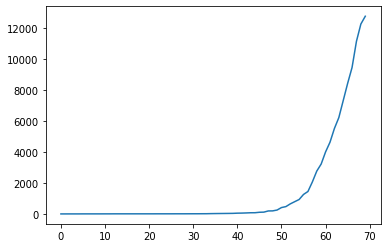

In [63]:
import matplotlib.pyplot as plt
confirmed = ndata[:,2].astype(float)
deceased = ndata[:,3].astype(float)
netconfirmed = confirmed - deceased
plt.plot(netconfirmed)
plt.show()

In [74]:
# Fit to an exponential model
x = np.arange(len(netconfirmed))
y = netconfirmed
'''
y = Ae^(Bx)
log(y) = log(A) + Bx * log(e) -> log(y) = log(A) + Bx
So fit (log y) against x.
e^(log(y)) = e^(log(A)) * e^(Bx) -> y = e^(log(A)) * e^(Bx)

Note that fitting (log y) as if it is linear will emphasize small values of y, causing large deviation for 
large y. This is because polyfit (linear regression) works by minimizing ∑i (ΔY)2 = ∑i (Yi − Ŷi)2. 
When Yi = log yi, the residues ΔYi = Δ(log yi) ≈ Δyi / |yi|. So even if polyfit makes a very bad decision 
or large y, the "divide-by-|y|" factor will compensate for it, causing polyfit favors small values.

This could be alleviated by giving each entry a "weight" proportional to y. polyfit supports 
weighted-least-squares via the w keyword argument.

credit to kennytm at stack overflow
https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
'''

B,log_A = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
print(log_A, B)

-2.1475071490522746 0.17099051746084398


In [75]:
def exp_approx(x): return np.exp(log_A) * np.exp(B * x)

vec_exp_approx = np.vectorize(exp_approx)
approx = vec_exp_approx(np.arange(len(netconfirmed)))

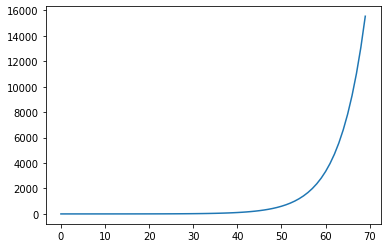

In [77]:
plt.plot(approx)
plt.show()

In [78]:
'''
This reproduces the procedure outlined in 
COVID-19 in Canada: Predictions for the future and control lessons from Asia paper by
Cornelius Christian and Francis Christian which can be found here:
https://www.medrxiv.org/content/10.1101/2020.03.21.20040667v1
'''

'\nThis replicates the procedure outlined in \nCOVID-19 in Canada: Predictions for the future and control lessons from Asia paper by\nCornelius Christian and Francis Christian which can be found here:\nhttps://www.medrxiv.org/content/10.1101/2020.03.21.20040667v1\n'

In [ ]:
# Fit to Normal Distribution
